In [2]:
%matplotlib notebook

In [3]:
import site
import numpy as np

import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

site.addsitedir('/mnt/c/Users/austr/OneDrive/Documents/GitHub/Subhalo Particle Visualizer/py/illustris_python') 
import illustris_python as il

In [4]:
basePath = './Illustris-3/'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [5]:
dat = il.snapshot.loadSubhalo(basePath, 135, 608, 'stars', fields=None)

In [6]:
GroupFirstSub = il.groupcat.loadHalos(basePath,135,fields=['GroupFirstSub'])

In [7]:
GroupFirstSub[1]

608

In [8]:
dat.keys()

dict_keys(['Velocities', 'count', 'NumTracers', 'GFM_Metals', 'Potential', 'SubfindHsml', 'SubfindVelDisp', 'Masses', 'GFM_StellarFormationTime', 'SubfindDensity', 'Coordinates', 'GFM_Metallicity', 'GFM_InitialMass', 'GFM_StellarPhotometrics', 'ParticleIDs'])

In [48]:
#Stellar magnitudes in eight bands: U, B, V, K, g, r, i, z
stel_mags = dat['GFM_StellarPhotometrics']
masses = dat['Masses']
metals = dat['GFM_Metallicity']

In [10]:
rot_z = widgets.IntSlider(description='z-theta:', min = 0, max = 360)
display(rot_z)

IntSlider(value=0, description='z-theta:', max=360)

In [49]:
coords = dat['Coordinates']

x = (np.max(coords[:,0]) + np.min(coords[:,0])) / 2
y = (np.max(coords[:,1]) + np.min(coords[:,1])) / 2
z = (np.max(coords[:,2]) + np.min(coords[:,2])) / 2

# center our data around orgin
coords = coords - [x, y, z]

theta = np.radians(rot_z.value)
c, s = np.cos(theta), np.sin(theta)
rot_mat_z = np.array(((c,-s, 0), (s, c, 0),(0, 0, 1)))

coords = coords @ rot_mat_z

In [52]:
range_arr = [[coords[:,0].min(), coords[:,0].max()],[coords[:,1].min(), coords[:,1].max()]]
H_n, xedges, yedges  = np.histogram2d(x=coords[:,0], y = coords[:,1], bins = [25,25], range = range_arr)
H_metals, xedges_metals, yedges_metals  = np.histogram2d(x=coords[:,0], y = coords[:,1], bins = [25,25], range = range_arr, weights = metals)
H_mass, xedges_mass, yedges_mass  = np.histogram2d(x=coords[:,0], y = coords[:,1], bins = [25,25], range = range_arr, weights = masses)

# set 0s as 1s for nat log
H_n[H_n == 0] = 1  
H_metals[H_metals == 0] = 1   
H_mass[H_mass == 0] = 1   

H = [np.log(H_n), np.log(H_metals), np.log(H_mass)]
labels = [[np.floor(xedges), np.floor(yedges)], [np.floor(xedges_metals), np.floor(yedges_metals)], [np.floor(xedges_mass), np.floor(yedges_mass)]]

/home/aust427/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


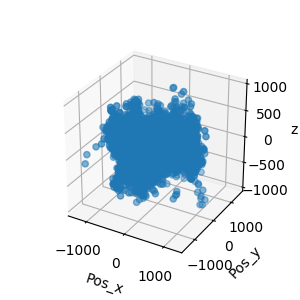

Text(0.5,0,'z')

In [53]:
fig = plt.figure(figsize= (3,3))
ax = fig.gca(projection='3d')
ax.scatter(xs=coords[:,0], ys=coords[:,1], zs=coords[:,2])
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('z')

<IPython.core.display.Javascript object>


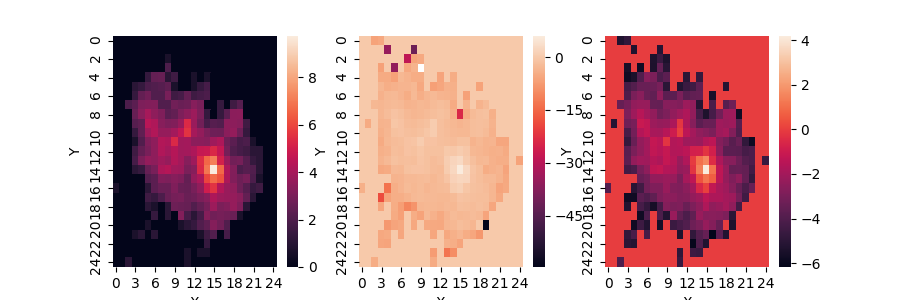

In [55]:
fig,axn = plt.subplots(1, 3, figsize= (9, 3))

i = 0 
for ax in axn.flat:
    sns.heatmap(data = H[i], ax=ax)
    ax.set(xlabel='X', ylabel='Y')
    i = i + 1